## ANN model using HOG, LBP and Raw pixels 

This notebook does the following:


### 1. Importing all the necessary python packages

All the neccessary python packages are imported.

In [196]:
import image_preprocessing as ip
import numpy as np
import cv2
import os
import random
from imutils import paths
from skimage import feature
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import random



In [197]:
random.seed(50)

## 2. Importing the dataset and Converting Labels to Tensor

To Import the dataset the function load_dataset() was used from image_preprocessing.py file.


**load_dataset(dataset_folder_path)**

    This function loads the dataset from the folder specified by dataset_folder_path. The folder should contain subfolders, and each subfolder name should represent a label. The function then loads all images from each label's corresponding subfolder and returns two lists: one list containing the loaded images, and the other containing their respective labels.

Parameters

    dataset_folder_path (str): the path to the folder containing the dataset. The folder should contain subfolders, where each subfolder name represents a label.

Returns

    data (list): A list containing all loaded images.
    labels (list): A list containing the corresponding labels of each image in the data list.




<BR>
<BR>


Similarly, to convert images in tensor the function convert_labels_to_one_hot_encoding() was used 

**convert_labels_to_one_hot_encoding(labels)**

    This function takes a list of labels as input and converts them into one-hot encoded vectors. The resulting one-hot encoded labels are returned as numpy arrays, along with the column names of the dummy dataframe.

Parameters

    - labels (list): A list of labels to be converted to one-hot encoded vectors.

Returns

    - one_hot_encoded_labels (numpy array): A 2D numpy array representing the one-hot encoded labels.
    - column_names (Index): A pandas Index object containing the column names of the dummy dataframe.

In [198]:
def convert_labels_to_one_hot_encoding(labels):

    # convert the labels to one-hot encoded vectors
    dummies_df = pd.get_dummies(labels)

    one_hot_encoded_labels = np.array(dummies_df)
    
    # convert the one-hot encoded vectors to tensors
    return one_hot_encoded_labels, dummies_df.columns

In [199]:
dataset_path = ".//dataset//"

data, labels = ip.load_dataset(dataset_path)

labels, label_names = convert_labels_to_one_hot_encoding(labels)

Number of Images:  5000


#### 2.1 Visualising Images

d:\Academic\UTS\deep_learning\AT1\.venv\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


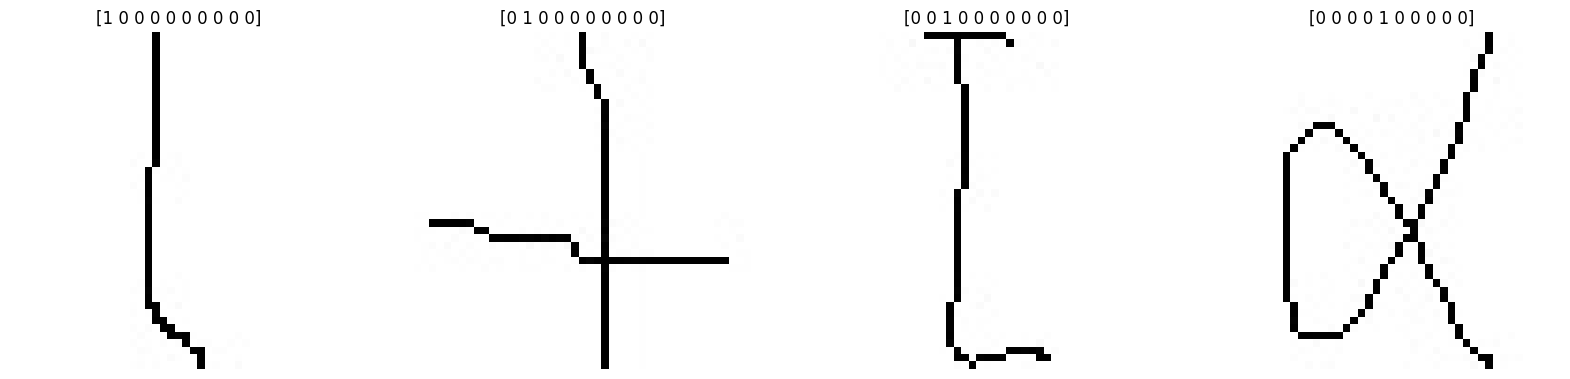

In [200]:
# Visualize the data at index 0, 500, 1000, 2000

idx = [10, 510, 1010, 2010]

plt.figure(figsize=(20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(data[idx[i]], cmap="gray")
    plt.title(labels[idx[i]])
    plt.axis("off")
plt.show()


In [201]:
# print unique label names
print("Unique Labels: ", set(label_names))


Unique Labels:  {'alpha', 'times', 'beta', '(', 'neq', '+', 'sum', 'geq', '[', ']'}


## 3. Data Preprocessing

The following steps are done in this section.

- Splits the Dataset into three parts. Training, Testing and Validation Dataset 
- Then converts the data into HOG, LBP and RAW 
- Convert all the dataset to tensors


To convert images into desired formats three different functions were used from image_preprocessing.py

These three functions are 

**convert_to_HOG(data, orientations=9, pixels_per_cell=(5, 5), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")**

    This function converts images into HOG (Histogram of Oriented Gradients) features using the hog function from the scikit-image library. It takes a list of images as input and returns a list of HOG features for each image.

    Parameters

        - data : A list of images to be converted into HOG features.
        - orientations : The number of orientation bins to use in the HOG feature descriptor. Default is 9.
        - pixels_per_cell : The size (in pixels) of a cell. It determines the granularity of the HOG feature. Default is (5,5).
        - cells_per_block : The number of cells in each block. Default is (2,2).
        - transform_sqrt : A boolean parameter that indicates whether or not the square-root of each pixel intensity should be computed before calculating the HOG feature.Default is True.
        - block_norm : The type of block normalization to apply. Default is "L2-Hys".

    Returns

        hog_images (list): A list of HOG features for each image in the input data




<BR>
<BR>


**convert_to_LBP(data, numPoints = 24, radius = 8, eps=1e-7)**

    This function converts a set of images into Local Binary Pattern (LBP) features. It applies the LBP algorithm to extract texture information from each image and then normalizes the LBP histogram of each image.

    Parameters

        - data: A list of images to be converted to LBP features.
        - numPoints: An integer, the number of points used to build the circular LBP pattern. It defaults to 24.
        - radius: An integer, the radius of the circular LBP pattern. It defaults to 8.
        - eps: A small float value to prevent division by zero. It defaults to 1e-7.

    Returns

        lbp_images (list): A list of LBP feature histograms, one for each input image.



<BR>
<BR>


**convert_2d_to_1d(data)**

    This function takes a 2D array (list of lists) as input and returns a 1D array (list). The function first initializes an empty list data_1d. It then iterates over each element img in the input 2D array data. For each img, the ravel() method is applied to flatten the image into a 1D array img_1d. The img_1d is then appended to the data_1d list. Finally, the function returns the data_1d list containing all the 1D arrays.

    Parameters

        - data: A list of images to be converted to 1D array.

    Returns

        data_1d (list): 1-D array 


In [202]:
# train test split
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.20, random_state=42)

# Creating a validation set from the training set (25 % of the training set)
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.25, random_state=42)

In [203]:
# Print Length of Training, Validation and Test Sets 

print("Length of Training Set: ", len(trainData))
print("Length of Validation Set: ", len(valData))
print("Length of Test Set: ", len(testData))


Length of Training Set:  3000
Length of Validation Set:  1000
Length of Test Set:  1000


In [204]:
# convert the images into HOG features. All the images are preprocessed before converting into HOG features
trainHOG = np.array(ip.convert_to_HOG(ip.preprocess_data(trainData, normalise = True)))
testHOG = np.array(ip.convert_to_HOG(ip.preprocess_data(testData, normalise = True)))
valHOG = np.array(ip.convert_to_HOG(ip.preprocess_data(valData, normalise = True)))


# convert tje images into 1d array
trainRAW = np.array(ip.convert_2d_to_1d(ip.preprocess_data(trainData, normalise = True)))
testRAW = np.array(ip.convert_2d_to_1d(ip.preprocess_data(testData, normalise = True)))
valRAW = np.array(ip.convert_2d_to_1d(ip.preprocess_data(valData, normalise = True)))

# Convert the data(images) into LBP features
trainLBP = np.array(ip.convert_to_LBP(ip.preprocess_data(trainData), 24, 8))
testLBP = np.array(ip.convert_to_LBP(ip.preprocess_data(testData), 24, 8))
valLBP = np.array(ip.convert_to_LBP(ip.preprocess_data(valData), 24, 8))


## 4. Preparing Data for using TensorFlow

All of the data is converted into Tensors

In [205]:
# Coverting HOG features into tensors
trainHOG = tf.convert_to_tensor(trainHOG, dtype=tf.float32)
testHOG = tf.convert_to_tensor(testHOG, dtype=tf.float32)
valHOG = tf.convert_to_tensor(valHOG, dtype=tf.float32)


In [206]:
# Coverting LBP features into tensors
trainLBP = tf.convert_to_tensor(trainLBP, dtype=tf.float32)
testLBP = tf.convert_to_tensor(testLBP, dtype=tf.float32)
valLBP = tf.convert_to_tensor(valLBP, dtype=tf.float32)


In [207]:
# Convert the data(images) into 1d array into tensors
trainRAW = tf.convert_to_tensor(trainRAW, dtype=tf.float32)
testRAW = tf.convert_to_tensor(testRAW, dtype=tf.float32)
valRAW = tf.convert_to_tensor(valRAW, dtype=tf.float32)

In [208]:
# Converting the labels into tensors
trainLabels = tf.convert_to_tensor(trainLabels, dtype=tf.float32)
testLabels = tf.convert_to_tensor(testLabels, dtype=tf.float32)
valLabels = tf.convert_to_tensor(valLabels, dtype=tf.float32)


In [209]:
# Creating a Dataframe to display the shape of all the features and labels
shape_dict = {'Features': ['HOG', 'LBP', 'RAW'],
               'Train': [trainHOG.shape, trainLBP.shape, trainRAW.shape],
                 'Validation': [valHOG.shape, valLBP.shape, valRAW.shape],
                   'Test': [testHOG.shape, testLBP.shape, testRAW.shape]}

pd.DataFrame(shape_dict)

,Features,Train,Validation,Test
0,HOG,"(3000, 2304)","(1000, 2304)","(1000, 2304)"
1,LBP,"(3000, 26)","(1000, 26)","(1000, 26)"
2,RAW,"(3000, 2025)","(1000, 2025)","(1000, 2025)"


## 5. ANN using HOG

In [210]:
# Creating a ANN model such that it takes 2304 input features and has 2 hidden layer of 12 and 10 neurons and 1 output layer of 10 neurons. Using ReLU activation function for the hidden layer and softmax activation function for the output layer. Use cross entropy loss function and Adam optimizer. 
# Training the model for 10 epochs and report the training and validation accuracy. Moreover, the output of the model should be the class label with the highest probability.

# Input layer: 2304 from trainHOG
# Output Layer: 10 categories from trainLabels
# validation data: valHOG, valLabels


# create a model
model_hog = tf.keras.models.Sequential()

# add the input layer
model_hog.add(tf.keras.layers.Dense(12, activation='relu', input_shape=(2304,)))

# Add the hidden layer
model_hog.add(tf.keras.layers.Dense(10, activation='relu'))

# add the output layer
model_hog.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model_hog.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model_hog.fit(trainHOG, trainLabels, epochs=10, validation_data=(valHOG, valLabels))



Epoch 1/10
94/94 [==============================] - 1s 4ms/step - loss: 1.9260 - accuracy: 0.3553 - val_loss: 1.5367 - val_accuracy: 0.4970
Epoch 2/10
94/94 [==============================] - 0s 3ms/step - loss: 1.1900 - accuracy: 0.5787 - val_loss: 0.9766 - val_accuracy: 0.7260
Epoch 3/10
94/94 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.8240 - val_loss: 0.5749 - val_accuracy: 0.8230
Epoch 4/10
94/94 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8670 - val_loss: 0.3746 - val_accuracy: 0.9140
Epoch 5/10
94/94 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.9537 - val_loss: 0.2316 - val_accuracy: 0.9470
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9667 - val_loss: 0.1839 - val_accuracy: 0.9530
Epoch 7/10
94/94 [==============================] - 0s 3ms/step - loss: 0.1183 - accuracy: 0.9773 - val_loss: 0.1531 - val_accuracy: 0.9590
Epoch 8/10
94/94 [==

In [211]:
# Calculate the accuracy of the model on the test data
_, testAccHOG = model_hog.evaluate(testHOG, testLabels)
print('Test accuracy:', testAccHOG)


32/32 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9650
Test accuracy: 0.9649999737739563


## 6. ANN model using RAW Features

In [212]:
# Create a ANN model such that it takes 2304 input features and has 1 hidden layer of 1200 neurons and 1 output layer of 10 neurons. Use ReLU activation function for the hidden layer and softmax activation function for the output layer. Use cross entropy loss function and Adam optimizer. 
# Train the model for 10 epochs and report the training and validation accuracy. Moreover, the output of the model should be the class label with the highest probability.

# Input layer: 2025 from trainRaw
# Output Layer: 10 categories from trainLabels
# validation data: valRAW, valLabels

# Creatthe model
model_raw = tf.keras.models.Sequential()

# add the input layer
model_raw.add(tf.keras.layers.Dense(1200, activation='relu', input_shape=(2025,)))

# add the output layer
model_raw.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model_raw.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model_raw.fit(trainRAW, trainLabels, epochs=25, validation_data=(valRAW, valLabels))

Epoch 1/25
94/94 [==============================] - 2s 19ms/step - loss: 3.1570 - accuracy: 0.1743 - val_loss: 2.2177 - val_accuracy: 0.2270
Epoch 2/25
94/94 [==============================] - 2s 18ms/step - loss: 1.8632 - accuracy: 0.3990 - val_loss: 1.5778 - val_accuracy: 0.5320
Epoch 3/25
94/94 [==============================] - 2s 18ms/step - loss: 1.4060 - accuracy: 0.5760 - val_loss: 1.2133 - val_accuracy: 0.6730
Epoch 4/25
94/94 [==============================] - 2s 18ms/step - loss: 1.0532 - accuracy: 0.7050 - val_loss: 0.8840 - val_accuracy: 0.7850
Epoch 5/25
94/94 [==============================] - 2s 18ms/step - loss: 0.8115 - accuracy: 0.7830 - val_loss: 0.8484 - val_accuracy: 0.7550
Epoch 6/25
94/94 [==============================] - 2s 18ms/step - loss: 0.6795 - accuracy: 0.8060 - val_loss: 0.8206 - val_accuracy: 0.7110
Epoch 7/25
94/94 [==============================] - 2s 18ms/step - loss: 0.6001 - accuracy: 0.8273 - val_loss: 0.5386 - val_accuracy: 0.8360
Epoch 8/25
94

In [213]:
# Calculate the accuracy of the model on the test data
_, testAccRAW = model_raw.evaluate(testRAW, testLabels)
print('Test accuracy:', testAccRAW)

32/32 [==============================] - 0s 4ms/step - loss: 0.2540 - accuracy: 0.9230
Test accuracy: 0.9229999780654907


## 7. ANN model using LBP Features

In [214]:
# Create a ANN model such that it takes 2304 input features and has 1 hidden layer of 28 neurons and 1 output layer of 10 neurons. Use ReLU activation function for the hidden layer and softmax activation function for the output layer. Use cross entropy loss function and Adam optimizer. 
# Train the model for 10 epochs and report the training and validation accuracy. Moreover, the output of the model should be the class label with the highest probability.

# Input layer: 26 from trainLBP
# Output Layer: 10 categories from trainLabelsLBP
# validation data: valLBP, valLabels

#https://www.researchgate.net/post/what_would_be_the_ideal_number_of_epoch_for_my_Neural_Network

# Creatthe model
model_lbp = tf.keras.models.Sequential()

# add the input layer
model_lbp.add(tf.keras.layers.Dense(26, activation='relu', input_shape=(26,)))

# add hidden layer
model_lbp.add(tf.keras.layers.Dense(50, activation='relu'))

# add the output layer
model_lbp.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model
model_lbp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
model_lbp.fit(trainLBP, trainLabels, epochs=400, validation_data=(valLBP, valLabels))



Epoch 1/400
94/94 [==============================] - 1s 2ms/step - loss: 2.2863 - accuracy: 0.1220 - val_loss: 2.2528 - val_accuracy: 0.1860
Epoch 2/400
94/94 [==============================] - 0s 1ms/step - loss: 2.1378 - accuracy: 0.1960 - val_loss: 1.9739 - val_accuracy: 0.2190
Epoch 3/400
94/94 [==============================] - 0s 1ms/step - loss: 1.8441 - accuracy: 0.2430 - val_loss: 1.7488 - val_accuracy: 0.2400
Epoch 4/400
94/94 [==============================] - 0s 1ms/step - loss: 1.7090 - accuracy: 0.2957 - val_loss: 1.6741 - val_accuracy: 0.3060
Epoch 5/400
94/94 [==============================] - 0s 1ms/step - loss: 1.6519 - accuracy: 0.3013 - val_loss: 1.6389 - val_accuracy: 0.3160
Epoch 6/400
94/94 [==============================] - 0s 1ms/step - loss: 1.6195 - accuracy: 0.3330 - val_loss: 1.6065 - val_accuracy: 0.3890
Epoch 7/400
94/94 [==============================] - 0s 1ms/step - loss: 1.5927 - accuracy: 0.3480 - val_loss: 1.5780 - val_accuracy: 0.3620
Epoch 8/400
9

In [215]:
# print the accuracy of the model on the test data
_, testAccLBP = model_lbp.evaluate(testLBP, testLabels)
print('Test accuracy:', testAccLBP)


32/32 [==============================] - 0s 768us/step - loss: 0.5176 - accuracy: 0.8240
Test accuracy: 0.8240000009536743


## 8. Comparing The Test accuracies 

In [216]:

accuracy_results = pd.DataFrame({'ANN' : [testAccHOG, testAccLBP, testAccRAW]}).set_index([['HOG', 'LBP', 'RAW']])
accuracy_results


,ANN
HOG,0.965
LBP,0.824
RAW,0.923


32/32 [==============================] - 0s 1ms/step


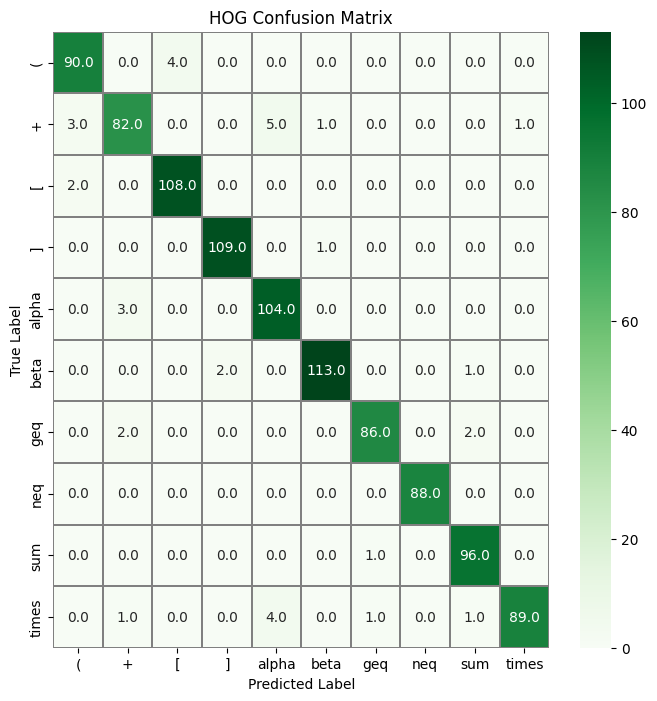

In [217]:
# creating confusion matrix for HOG model with labels from label names. where the index of '1' in label is the index of the label name in label names
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model_hog.predict(valHOG)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(valLabels,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("HOG Confusion Matrix")
plt.show()


32/32 [==============================] - 0s 618us/step


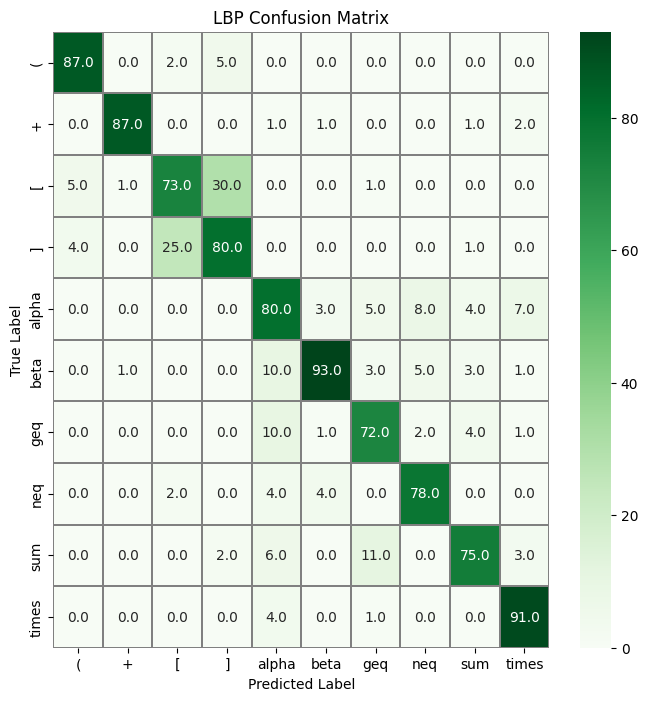

In [218]:
# creating confusion matrix for LBP model with labels from label names. 

# Predict the values from the validation dataset
Y_pred = model_lbp.predict(valLBP)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(valLabels,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LBP Confusion Matrix")
plt.show()


32/32 [==============================] - 0s 3ms/step


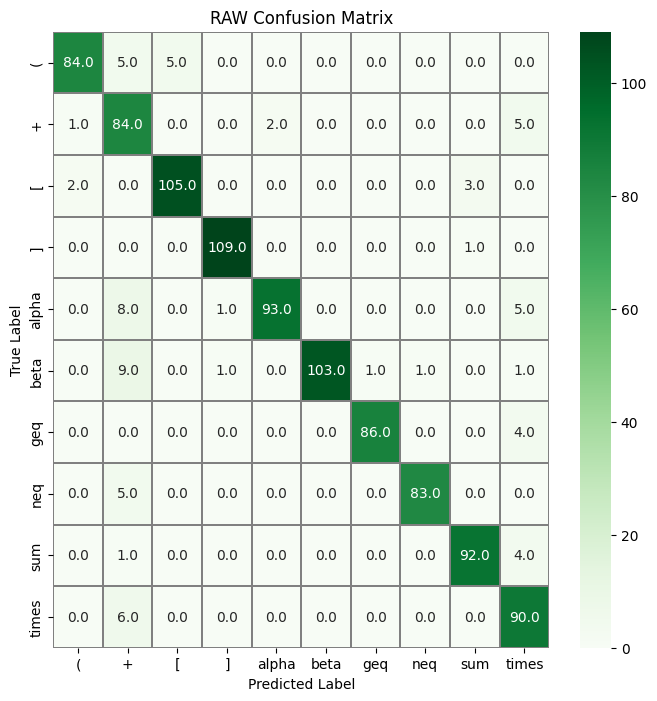

In [219]:
# creating confusion matrix for RAW model with labels from label names.

# Predict the values from the validation dataset
Y_pred = model_raw.predict(valRAW)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(valLabels,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RAW Confusion Matrix")
plt.show()


In [220]:
# What are the model parameters of HOG model?

model_hog.summary()


Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_155 (Dense)           (None, 12)                27660     
                                                                 
 dense_156 (Dense)           (None, 10)                130       
                                                                 
 dense_157 (Dense)           (None, 10)                110       
                                                                 
Total params: 27,900
Trainable params: 27,900
Non-trainable params: 0
_________________________________________________________________
